In [4]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Bank Customer Segmentation Analysis - Student Exercise

In this lab, you will implement customer segmentation using K-means clustering. You'll learn how to:
1. Preprocess data for clustering
2. Perform and visualize dimensionality reduction
3. Implement K-means clustering from scratch
4. Evaluate clustering results

Follow the instructions in each section and fill in the code where indicated.

In [62]:
# Load Data and Preprocess
def load_data(filepath):
    pass

#================ FOR PCA Dimensionality reduction =========
# Apply PCA for Dimensionality Reduction
def apply_pca(x, n_components):
    pass

#================ FOR K-Means ===============================
# Find Optimal Clusters for KMeans (Elbow Method) 
def find_optimal_clusters(x, max_clusters=10):
    pass

# Perform KMeans Clustering 
# Change None to the number of n_clusters value from the elbow method
def perform_kmeans_clustering(x, n_clusters=None):
    pass

#================ FOR Agglomerative ===============================
# Perform Agglomerative Clustering 
# Change None to the number of n_clusters value from the elbow method
def perform_agglomerative_clustering(x, n_clusters=None):
    pass

#================FOR Dendrogram===============================
# Get Linkages for Dendrogram
def get_linkages(x):
    pass

# Plot Dendrogram
def plot_dendrogram(linked):
    pass

## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

In [5]:
# ...existing code...
def load_data(filepath):
    """Load and preprocess the bank marketing dataset.
    - reads CSV (comma or semicolon)
    - label-encodes categorical cols present
    - scales selected features
    """
    # robust CSV read
    df = pd.read_csv(filepath, sep=None, engine='python')

    categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                        'loan', 'contact', 'month', 'poutcome', 'y']
    for col in categorical_cols:
        if col in df.columns:
            df[col] = LabelEncoder().fit_transform(df[col].astype(str))

    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education',
                'housing', 'loan', 'default']
    features = [f for f in features if f in df.columns]
    X = df[features].copy().values

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, df

# Load and preprocess the data
X_scaled, data = load_data('bank-full.csv')
print("Data shape:", X_scaled.shape)

Data shape: (45211, 9)


In [6]:
# ...existing code...
class KMeansClustering:
    """Simple K-means implementation used in the notebook exercises."""
    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = int(n_clusters)
        self.max_iters = int(max_iters)
        self.random_state = int(random_state)
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        rng = np.random.RandomState(self.random_state)
        n_samples = X.shape[0]
        if self.n_clusters > n_samples:
            raise ValueError("n_clusters must be <= n_samples")
        indices = rng.choice(n_samples, size=self.n_clusters, replace=False)
        return X[indices].astype(float).copy()

    def _assign_clusters(self, X):
        if self.centroids is None:
            raise ValueError("Centroids not initialized.")
        dists = np.linalg.norm(X[:, None, :] - self.centroids[None, :, :], axis=2)
        return np.argmin(dists, axis=1)

    def _update_centroids(self, X, labels):
        n_features = X.shape[1]
        new_centroids = np.zeros((self.n_clusters, n_features), dtype=float)
        for k in range(self.n_clusters):
            members = X[labels == k]
            if len(members) == 0:
                # reinitialize empty centroid to a random data point
                new_centroids[k] = X[np.random.randint(0, X.shape[0])]
            else:
                new_centroids[k] = members.mean(axis=0)
        return new_centroids

    def fit(self, X):
        X = np.asarray(X, dtype=float)
        self.centroids = self._initialize_centroids(X)
        for _ in range(self.max_iters):
            labels = self._assign_clusters(X)
            new_centroids = self._update_centroids(X, labels)
            if np.allclose(self.centroids, new_centroids, atol=1e-6):
                self.centroids = new_centroids
                self.labels = labels
                return self
            self.centroids = new_centroids
            self.labels = labels
        # final assignment
        self.labels = self._assign_clusters(X)
        return self

    def predict(self, X):
        if self.centroids is None:
            raise ValueError("Model has not been fitted yet. Call fit(X) first.")
        return self._assign_clusters(np.asarray(X, dtype=float))
# ...existing code...

## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:

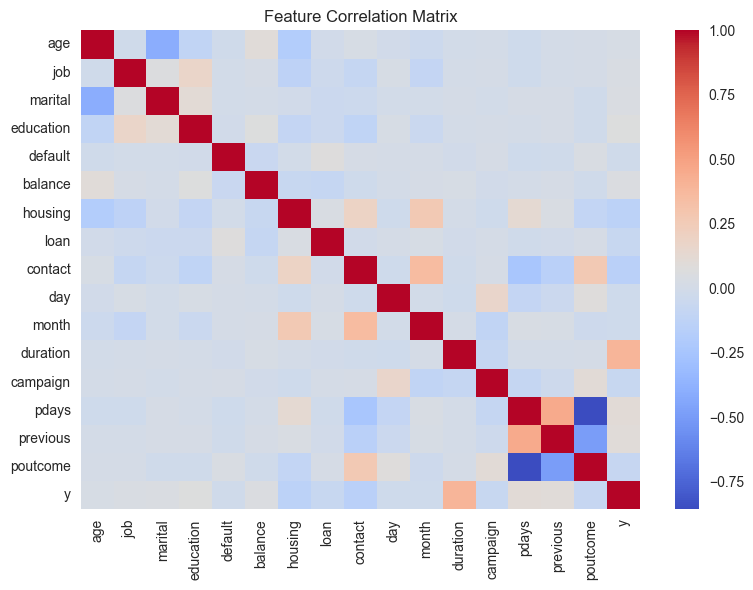

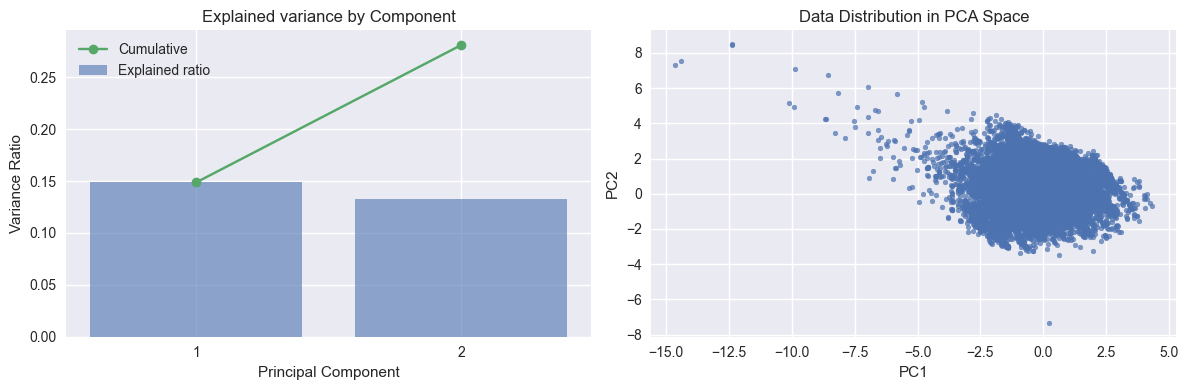

Shape after PCA: (45211, 2)


In [13]:
# ...existing code...
import seaborn as sns

# === Feature Correlation Matrix ===
plt.figure(figsize=(8, 6))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

def apply_pca(X, n_components=2):
    """Fit PCA, plot explained variance + cumulative and 2D scatter, return X_pca and pca."""
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    plt.figure(figsize=(12, 4))

    # explained variance and cumulative
    plt.subplot(1, 2, 1)
    evr = pca.explained_variance_ratio_
    plt.bar(np.arange(1, len(evr) + 1), evr, alpha=0.6, label='Explained ratio')
    plt.plot(np.arange(1, len(evr) + 1), np.cumsum(evr), marker='o', color='C1', label='Cumulative')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Ratio')
    plt.title('Explained variance by Component')
    plt.xticks(np.arange(1, len(evr) + 1))
    plt.legend()

    # 2D scatter of first two components
    plt.subplot(1, 2, 2)
    if X_pca.shape[1] >= 2:
        plt.scatter(X_pca[:, 0], X_pca[:, 1], s=12, alpha=0.7)
        plt.xlabel('PC1'); plt.ylabel('PC2')
        plt.title('Data Distribution in PCA Space')
    else:
        plt.plot(X_pca[:, 0], np.zeros_like(X_pca[:, 0]), '.')
        plt.title('1D PCA projection')

    plt.tight_layout()
    plt.show()

    return X_pca
# ...existing code...

# Apply PCA
X_pca = apply_pca(X_scaled)
print("Shape after PCA:", X_pca.shape)

## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:

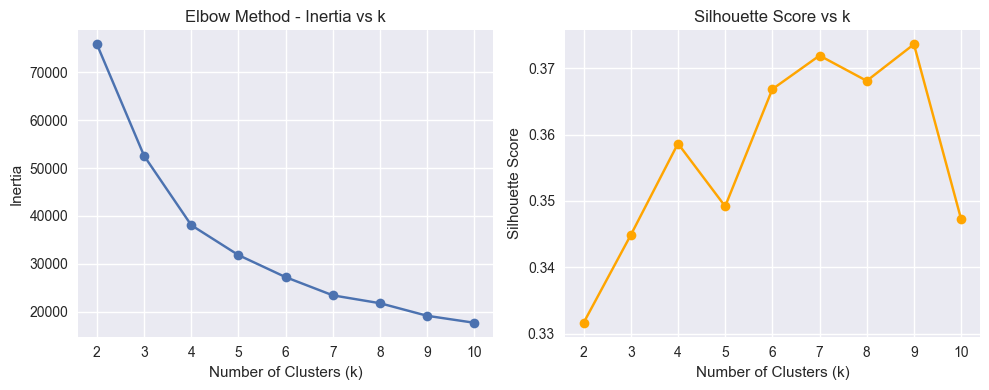

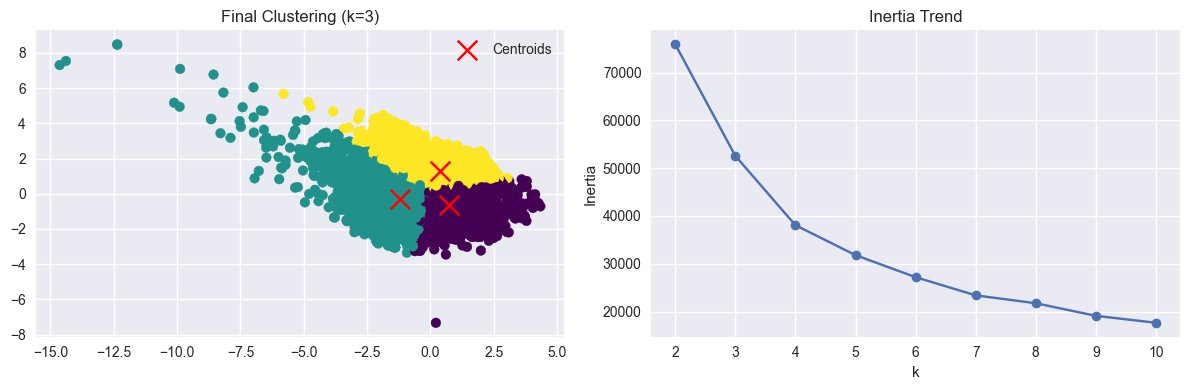


Clustering Evaluation:
Inertia: 52565.33
Silhouette Score: 0.34


In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------------------
# 1️⃣ Inertia calculation
# ----------------------------------------------------
def calculate_inertia(X, labels, centroids):
    """Compute within-cluster sum of squared distances (inertia)."""
    X = np.asarray(X)
    labels = np.asarray(labels)
    inertia = 0.0
    for k, c in enumerate(centroids):
        members = X[labels == k]
        if members.size == 0:
            continue
        inertia += np.sum((members - c) ** 2)
    return float(inertia)

# ----------------------------------------------------
# 2️⃣ Elbow curve plotting
# ----------------------------------------------------
def plot_elbow_curve(X, max_k=10):
    """Plot elbow curve and return list of inertias."""
    inertias = []
    sil_scores = []
    K = range(2, max_k + 1)  # start from 2 for silhouette validity

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
        sil_scores.append(silhouette_score(X, kmeans.labels_))

    # Plot elbow curve
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.plot(K, inertias, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method - Inertia vs k')

    plt.subplot(1, 2, 2)
    plt.plot(K, sil_scores, marker='o', color='orange')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs k')

    plt.tight_layout()
    plt.show()

    return inertias, sil_scores

# ----------------------------------------------------
# 3️⃣ Usage Example
# ----------------------------------------------------
inertias, sil_scores = plot_elbow_curve(X_pca)

# Choose optimal k from elbow/silhouette
optimal_k = 3  # for example

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_pca)

# ----------------------------------------------------
# 4️⃣ Visualization
# ----------------------------------------------------
plt.figure(figsize=(12, 4))

# Cluster plot
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='x', s=200, label='Centroids')
plt.title(f'Final Clustering (k={optimal_k})')
plt.legend()

# Metric plot
plt.subplot(1, 2, 2)
plt.plot(range(2, len(inertias) + 2), inertias, marker='o')
plt.title('Inertia Trend')
plt.xlabel('k')
plt.ylabel('Inertia')

plt.tight_layout()
plt.show()

# ----------------------------------------------------
# 5️⃣ Evaluation Metrics
# ----------------------------------------------------
inertia = calculate_inertia(X_pca, kmeans.labels_, kmeans.cluster_centers_)
silhouette = silhouette_score(X_pca, kmeans.labels_)

print("\nClustering Evaluation:")
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.2f}")


## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.

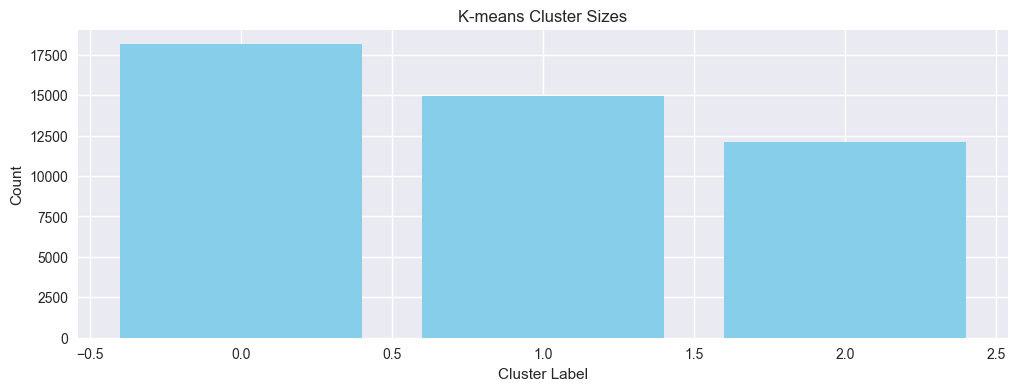

C:\Users\diyap\AppData\Local\Temp\ipykernel_34208\1706890728.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=kmeans.labels_, y=sil_samples, palette='viridis')


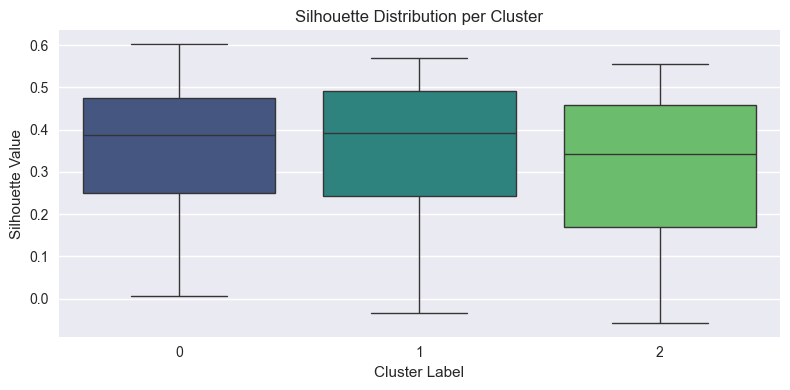


Running Bisecting K-Means...


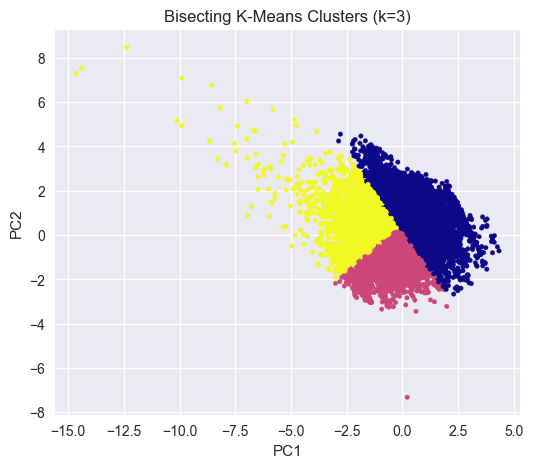

Silhouette Score (Bisecting K-Means): 0.338

Cluster tree splits: {np.int64(0): (np.int64(0), 1), np.int64(1): (np.int64(1), 2)}


In [14]:
# ...existing code...
class BisectingKMeans:
    """Bisecting K-means: recursively split the largest cluster using k=2 until target reached."""
    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = int(n_clusters)
        self.random_state = int(random_state)
        self.labels_ = None
        self.split_tree = {}
        self.centers_ = {}

    def fit_predict(self, X):
        from sklearn.cluster import KMeans
        X = np.asarray(X)
        n = X.shape[0]
        labels = np.zeros(n, dtype=int)
        next_label = 1
        self.centers_[0] = X.mean(axis=0)

        while len(np.unique(labels)) < self.n_clusters:
            uniq, counts = np.unique(labels, return_counts=True)
            sizes = dict(zip(uniq, counts))
            to_split = max(sizes.items(), key=lambda x: x[1])[0]
            idx = np.where(labels == to_split)[0]
            if len(idx) <= 1:
                break
            km = KMeans(n_clusters=2, random_state=self.random_state, n_init=10)
            sub_labels = km.fit_predict(X[idx])
            left_idx = idx[sub_labels == 0]
            right_idx = idx[sub_labels == 1]

            # keep left as original id, right gets new id
            labels[left_idx] = to_split
            labels[right_idx] = next_label

            self.split_tree[to_split] = (to_split, next_label)
            self.centers_[to_split] = X[labels == to_split].mean(axis=0)
            self.centers_[next_label] = X[labels == next_label].mean(axis=0)

            next_label += 1
            if next_label > self.n_clusters * 10:
                break

        self.labels_ = labels
        for lbl in np.unique(labels):
            self.centers_[lbl] = X[labels == lbl].mean(axis=0)
        return self.labels_
# ...existing code...

# --- Cluster Sizes Bar Plot ---
plt.figure(figsize=(12, 4))
unique, counts = np.unique(kmeans.labels_, return_counts=True)
plt.bar(unique, counts, color='skyblue')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.title('K-means Cluster Sizes')
plt.show()

# --- Silhouette Distribution per Cluster (Box Plot) ---
from sklearn.metrics import silhouette_samples

sil_samples = silhouette_samples(X_pca, kmeans.labels_)
plt.figure(figsize=(8, 4))
sns.boxplot(x=kmeans.labels_, y=sil_samples, palette='viridis')
plt.xlabel('Cluster Label')
plt.ylabel('Silhouette Value')
plt.title('Silhouette Distribution per Cluster')
plt.tight_layout()
plt.show()

# =========================================================
# 🚀 Run and visualize Bisecting K-Means results
# =========================================================
print("\nRunning Bisecting K-Means...")

bkm = BisectingKMeans(n_clusters=3, random_state=42)
labels_bisect = bkm.fit_predict(X_pca)

# Plot results
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_bisect, cmap='plasma', s=10)
plt.title("Bisecting K-Means Clusters (k=3)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()

# Compute metrics
from sklearn.metrics import silhouette_score
sil_bisect = silhouette_score(X_pca, labels_bisect)
print(f"Silhouette Score (Bisecting K-Means): {sil_bisect:.3f}")

# Optional: visualize split structure (debug)
print("\nCluster tree splits:", bkm.split_tree)


## Bonus Challenges

If you've completed the main tasks, try these extensions:

1. Implement k-means++ initialization
   - Instead of random initialization, use the k-means++ algorithm
   - This should give better and more consistent results

2. Add cluster interpretation
   - Analyze the characteristics of each cluster
   - What features distinguish one cluster from another?
   - Create visualizations to show cluster properties

3. Try different distance metrics
   - Implement Manhattan distance instead of Euclidean
   - Compare the clustering results

4. Add outlier detection
   - Identify points far from all centroids
   - How might you handle these outliers?

Remember to document your code and explain your findings!